<a href="https://colab.research.google.com/github/Cammwr/DATA3000/blob/main/CamJuliaProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Our foundation libs
import numpy as np
import pandas as pd
import pandas as pd
import warnings


#Need this for some of the plots. Not suree what goes with what yet. So lets have them all?
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

#PACF - ACF(Used to measure correlations across different lengths of time/Shorter lengths of time. )
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Data Modeling
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#Import Data
holidays = 'holidays_events.csv'
holidays = pd.read_csv(holidays)

oil = 'oil.csv'
oil = pd.read_csv(oil)

stores = 'stores.csv'
stores = pd.read_csv(stores)

transactions = 'transactions.csv'
transactions = pd.read_csv(transactions)

train_data = 'train.csv'
train_data = pd.read_csv(train_data)

test_data = 'test.csv'
test_data = pd.read_csv(test_data)

## Data Exploration


In [ ]:
#View Data
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.00,AUTOMOTIVE,0.00,0.00
1,1,2013-01-01,1.00,BABY CARE,0.00,0.00
2,2,2013-01-01,1.00,BEAUTY,0.00,0.00
3,3,2013-01-01,1.00,BEVERAGES,0.00,0.00
4,4,2013-01-01,1.00,BOOKS,0.00,0.00


In [ ]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Data Cleaning

In [ ]:
#Clean Data - Drop NAs

train_data_cleaned = train_data.dropna()
test_data_cleaned = test_data.dropna()
holidays_cleaned = holidays.dropna()
stores_cleaned = stores.dropna()
oil_cleaned = oil.dropna()
transactions_cleaned = transactions.dropna()

In [ ]:
train_data_cleaned

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.00,AUTOMOTIVE,0.00,0.00
1,1,2013-01-01,1.00,BABY CARE,0.00,0.00
2,2,2013-01-01,1.00,BEAUTY,0.00,0.00
3,3,2013-01-01,1.00,BEVERAGES,0.00,0.00
4,4,2013-01-01,1.00,BOOKS,0.00,0.00
...,...,...,...,...,...,...
1136053,1136053,2014-10-01,34.00,POULTRY,196.66,0.00
1136054,1136054,2014-10-01,34.00,PREPARED FOODS,57.00,0.00
1136055,1136055,2014-10-01,34.00,PRODUCE,806.77,0.00
1136056,1136056,2014-10-01,34.00,SCHOOL AND OFFICE SUPPLIES,4.00,0.00


In [ ]:
combined_data = pd.concat([holidays_cleaned, train_data_cleaned], axis=0, ignore_index=True)

In [ ]:
combined_data

,date,type,locale,locale_name,description,transferred,id,store_nbr,family,sales,onpromotion
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,NaN,NaN,NaN,NaN,NaN
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN,NaN,NaN,NaN,NaN
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN,NaN,NaN,NaN,NaN
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN,NaN,NaN,NaN,NaN
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
559463,2013-11-10,NaN,NaN,NaN,NaN,NaN,559113.00,46.00,PLAYERS AND ELECTRONICS,0.00,0.00
559464,2013-11-10,NaN,NaN,NaN,NaN,NaN,559114.00,46.00,POULTRY,2084.38,0.00
559465,2013-11-10,NaN,NaN,NaN,NaN,NaN,559115.00,46.00,PREPARED FOODS,218.15,0.00
559466,2013-11-10,NaN,NaN,NaN,NaN,NaN,559116.00,46.00,PRODUCE,11.00,0.00


# Data Visulization

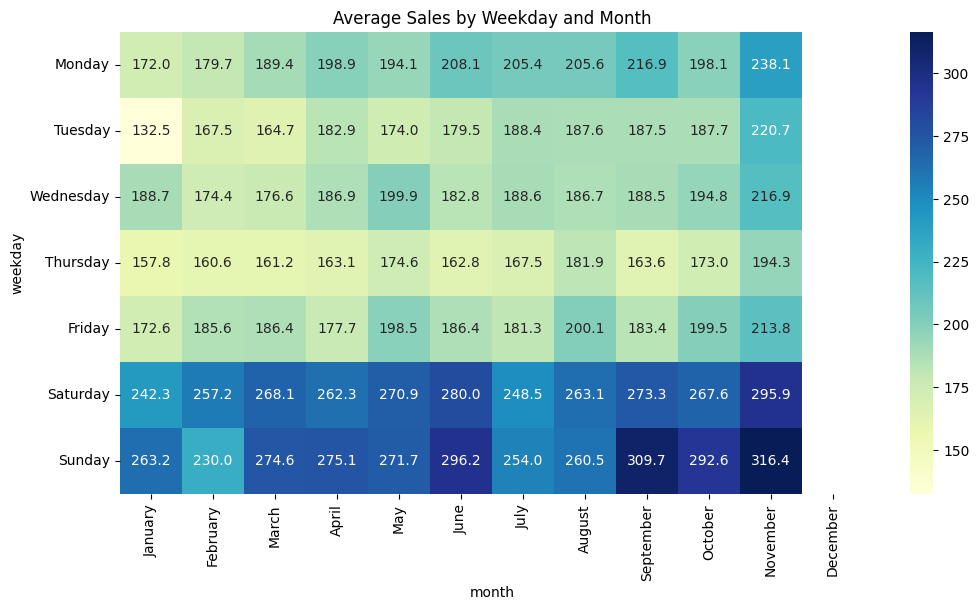

In [ ]:
train_data_cleaned['date'] = pd.to_datetime(train_data_cleaned['date'])
train_data_cleaned['weekday'] = train_data_cleaned['date'].dt.day_name()
train_data_cleaned['month'] = train_data_cleaned['date'].dt.month_name()

# Combination of sales by weekday and month
sales_pivot = train_data_cleaned.pivot_table(index='weekday', columns='month', values='sales', aggfunc='mean')

# Sort the pivot table to have months and weekdays in manually in order or else...
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_pivot = sales_pivot.reindex(index=weekday_order, columns=months_order)

# Plotting
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Sales by Weekday and Month')
plt.show()

#Merging Data Sets (If we make it :/)

## It's Mighty Model Time | *(ben10...)*